In [ ]:
#도미, 빙어 데이터 가져오기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
#도미, 빙어 데이터 합치기
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
#target 데이터를 np 이용하여 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#kneighbors()함수를 이용하여 훈련 세트, 테스트 세트 만들기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42, stratify=fish_target)

In [ ]:
#표준 점수로 변환
mean         = np.mean(train_input, axis = 0)        #행을 따라 열의 평균을 구해야 하므로 axis = 0
std          = np.std(train_input,  axis = 0)
#표준점수로 나타낸 훈련 데이터
train_scaled = (train_input - mean)/std
test_scaled  = (test_input - mean)/std

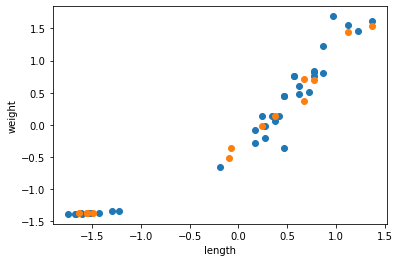

In [ ]:
#표준 점수로 변환한 데이터의 산점도 확인
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(test_scaled[:,0], test_scaled[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#모델 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_scaled, train_target)

In [ ]:
#테스트
kn.score(test_scaled, test_target)

1.0

In [ ]:
#임의의 도미 데이터를 표준 점수로 변환하고 모델 테스트 진행
new = ([25, 150] - mean)/std
kn.predict([new])

array([1.])

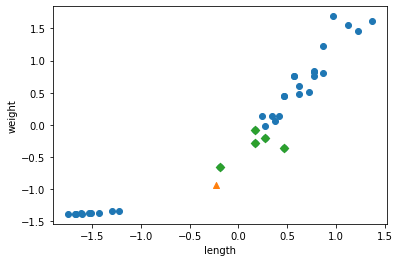

In [ ]:
#임의의 도미 데이터와 최근점한 5개 데이터를 알아보고 산점도를 그림
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()